In [2]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np

In [3]:
train = pd.read_csv('../data/mnist_train.csv')
test = pd.read_csv('../data/mnist_test.csv')

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(60000, 785)

In [7]:
test.shape

(10000, 785)

In [8]:
X_train = torch.FloatTensor(train.iloc[:, 1:].values)
y_train = torch.LongTensor(train['label'].values)
X_test = torch.FloatTensor(test.iloc[:, 1:].values)
y_test = torch.LongTensor(test['label'].values)

In [9]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(list(zip((X_train),(y_train))),batch_size=batch_size,shuffle=True,num_workers=2)
testloader = torch.utils.data.DataLoader(list(zip((X_test),(y_test))),batch_size=batch_size,shuffle=True,num_workers=2)

In [10]:
len(trainloader) * batch_size

60032

In [11]:
class SoftmaxReg(nn.Module):
    def __init__(self, x_dim, y_dim):
        super(SoftmaxReg,self).__init__()
        self.linear = nn.Linear(x_dim,y_dim)
    
    def forward(self,X):
        X = self.linear(X)
        return X

In [12]:
x_dim = X_train.shape[1]
y_dim = 10
x_dim,y_dim

(784, 10)

In [13]:
epochs = 50
lr = 0.01
model = SoftmaxReg(x_dim,y_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
losses = []

In [14]:
for epoch in range(epochs):
    epoch_loss = 0
    for i,(xi,yi) in enumerate(trainloader):
        output = model(xi)
        if(epoch == 49 and i == 0):
            print(output)
            print(yi)
            break
        loss = criterion(output,yi)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    avg_loss = epoch_loss/len(X_train)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1} , Loss: {avg_loss}')

Epoch 1 , Loss: 3.749404205830892
Epoch 2 , Loss: 2.746574052794774
Epoch 3 , Loss: 2.574110143347581
Epoch 4 , Loss: 2.498030886522929
Epoch 5 , Loss: 2.464461125342051
Epoch 6 , Loss: 2.386461287403107
Epoch 7 , Loss: 2.40150378221469
Epoch 8 , Loss: 2.3592026087125144
Epoch 9 , Loss: 2.3870033349364994
Epoch 10 , Loss: 2.3883397471904755
Epoch 11 , Loss: 2.3482601574579873
Epoch 12 , Loss: 2.2875495391368865
Epoch 13 , Loss: 2.2514812692801156
Epoch 14 , Loss: 2.2579852353264886
Epoch 15 , Loss: 2.2064429074923195
Epoch 16 , Loss: 2.1834984701991083
Epoch 17 , Loss: 2.2219405220389365
Epoch 18 , Loss: 2.3023713349501294
Epoch 19 , Loss: 2.1271121277332306
Epoch 20 , Loss: 2.241010716223717
Epoch 21 , Loss: 2.2199298716545104
Epoch 22 , Loss: 2.2011310583432517
Epoch 23 , Loss: 2.1924487110773723
Epoch 24 , Loss: 2.2332119484743416
Epoch 25 , Loss: 2.171559736188253
Epoch 26 , Loss: 2.206159513012568
Epoch 27 , Loss: 2.246602162329356
Epoch 28 , Loss: 2.1334198713302612
Epoch 29 , Lo

Text(0, 0.5, 'Loss')

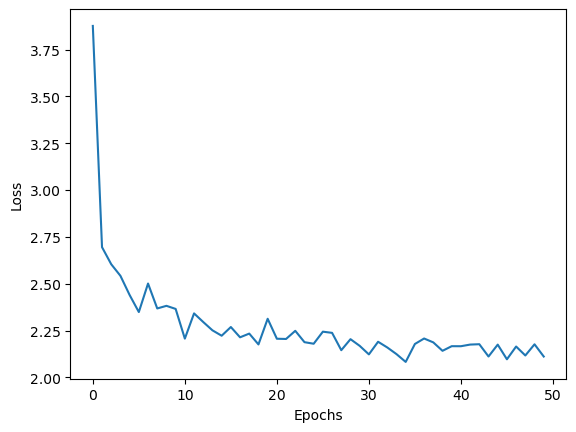

In [308]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses,label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [309]:
PATH = './mnistmodel.pth'
torch.save(model.state_dict(), PATH)

In [318]:
from sklearn.metrics import classification_report

model.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print(classification_report(y_pred=y_pred,y_true=y_true))


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       980
         1.0       0.98      0.92      0.95      1135
         2.0       0.96      0.75      0.84      1032
         3.0       0.59      0.97      0.73      1010
         4.0       0.78      0.94      0.85       982
         5.0       0.94      0.61      0.74       892
         6.0       0.98      0.80      0.88       958
         7.0       0.89      0.90      0.90      1028
         8.0       0.68      0.86      0.76       974
         9.0       0.97      0.61      0.75      1009

    accuracy                           0.84     10000
   macro avg       0.87      0.83      0.83     10000
weighted avg       0.87      0.84      0.84     10000

